In [ ]:
#Create a timeseries model that can predict concentrations of Pm2.5 in the atmosphere

In [3]:
## imports
import os
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import sklearn as skl
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#path = os.path.join(os.getcwd(), 'Resources', 'all_city_data.csv')

In [52]:
df = pd.read_csv('all_city_data.csv').drop(columns = ['Unnamed: 0'])

In [53]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,dt
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
1,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,2013-01-03 00:00:00
2,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,2013-01-03 00:00:00
3,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,2013-01-03 00:00:00
4,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,2013-01-03 00:00:00


In [6]:
# convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# look_back = 1
# TrainX, TrainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

In [7]:

# reshape input to be [samples, time steps, features]
# trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [37]:
features = ["PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN"]
scalar = StandardScaler()
# the fit_transform ops returns a 2d numpy.array, we cast it to a pd.DataFrame
standardized_features = pd.DataFrame(scalar.fit_transform(df[features].copy()), columns = features)
old_shape = df.shape
# drop the unnormalized features from the dataframe
df.drop(features, axis = 1, inplace = True)
# join back the normalized features
df = pd.concat([df, standardized_features], axis= 1)
assert old_shape == df.shape, "something went wrong!"

In [38]:
df.head()

,PM2.5,dt,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN
0,4.0,2013-01-03 00:00:00,-1.101254,-0.545907,-1.243556,-0.804110,0.348630,-1.242142,1.164563,-1.538262,-0.078906
1,9.0,2013-01-03 00:00:00,-1.046543,-0.592877,-0.958503,-0.804110,0.560363,-1.224639,1.308088,-1.726789,-0.078906
2,4.0,2013-01-03 00:00:00,-1.101254,-0.076203,-0.872987,-0.804110,0.207475,-1.242142,1.164563,-1.538262,-0.078906
3,7.0,2013-01-03 00:00:00,-1.068428,-0.592877,-1.386082,-0.976692,0.595652,-1.382164,0.906219,-1.676032,-0.078906
4,5.0,2013-01-03 00:00:00,-0.991832,-0.545907,-1.101029,-0.890401,0.489786,-1.224639,1.308088,-1.726789,-0.078906


(-1.0, 1.0)

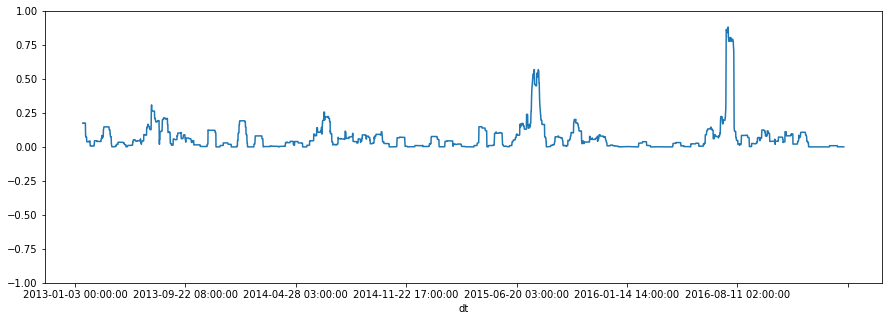

In [58]:
import matplotlib.pyplot as plt
df.groupby('dt').mean()['RAIN'].rolling(360).mean().plot(figsize=(15, 5))
plt.ylim(-1, 1)

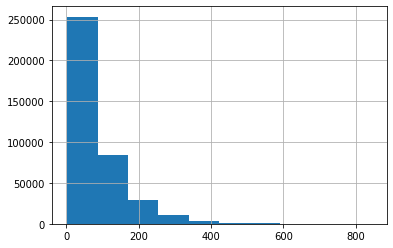

In [27]:
df_kl['PM2.5'].hist()

In [36]:
time_index=pd.to_datetime(df['dt'])
df_kl=df_kl.set_index(time_index)
df_kl.index

DatetimeIndex(['2013-01-03 00:00:00', '2013-01-03 00:00:00',
               '2013-01-03 00:00:00', '2013-01-03 00:00:00',
               '2013-01-03 00:00:00', '2013-01-03 00:00:00',
               '2013-01-03 00:00:00', '2013-01-03 00:00:00',
               '2013-01-03 00:00:00', '2013-01-03 00:00:00',
               ...
               '2017-12-02 23:00:00', '2017-12-02 23:00:00',
               '2017-12-02 23:00:00', '2017-12-02 23:00:00',
               '2017-12-02 23:00:00', '2017-12-02 23:00:00',
               '2017-12-02 23:00:00', '2017-12-02 23:00:00',
               '2017-12-02 23:00:00', '2017-12-02 23:00:00'],
              dtype='datetime64[ns]', name='dt', length=383586, freq=None)

In [24]:
df_kl=df.drop('dt', axis=1)
y = df_kl['PM2.5']
X = df_kl.drop(columns= ['PM2.5'])
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=False)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model=tf.keras.models.Sequential()
layer_1=tf.keras.layers.Dense(units=32, activation="relu", input_dim=9)
model.add(layer_1)
layer_2=tf.keras.layers.Dense(units=32, activation="relu", input_dim=9)
model.add(layer_2)
output_layer=tf.keras.layers.Dense(units=1)
model.add(output_layer)
model.summary()

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
8991/8991 [==============================] - 13s 1ms/step - loss: 512.5632 - mean_absolute_error: 14.5513
Epoch 2/20
8991/8991 [==============================] - 12s 1ms/step - loss: 509.9702 - mean_absolute_error: 14.5180
Epoch 3/20
8991/8991 [==============================] - 12s 1ms/step - loss: 508.5579 - mean_absolute_error: 14.4944
Epoch 4/20
8991/8991 [==============================] - 12s 1ms/step - loss: 505.5126 - mean_absolute_error: 14.4560
Epoch 5/20
8991/8991 [==============================] - 12s 1ms/step - loss: 505.1482 - mean_absolute_error: 14.4473
Epoch 6/20
8991/8991 [==============================] - 12s 1ms/step - loss: 504.0302 - mean_absolute_error: 14.4202
Epoch 7/20
8991/8991 [==============================] - 12s 1ms/step - loss: 502.6141 - mean_absolute_error: 14.4124
Epoch 8/20
8991/8991 [==============================] - 12s 1ms/step - loss: 501.1833 - mean_absolute_error: 14.3903
Epoch 9/20
8991/8991 [==============================] - 12s 1ms/

KeyboardInterrupt: ignored

In [ ]:
# if it doesn't change (much) based on the data, then it's a static variable
# identify columns that have seasonality or notable trend (over time)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e21737610>,
      dtype=object)

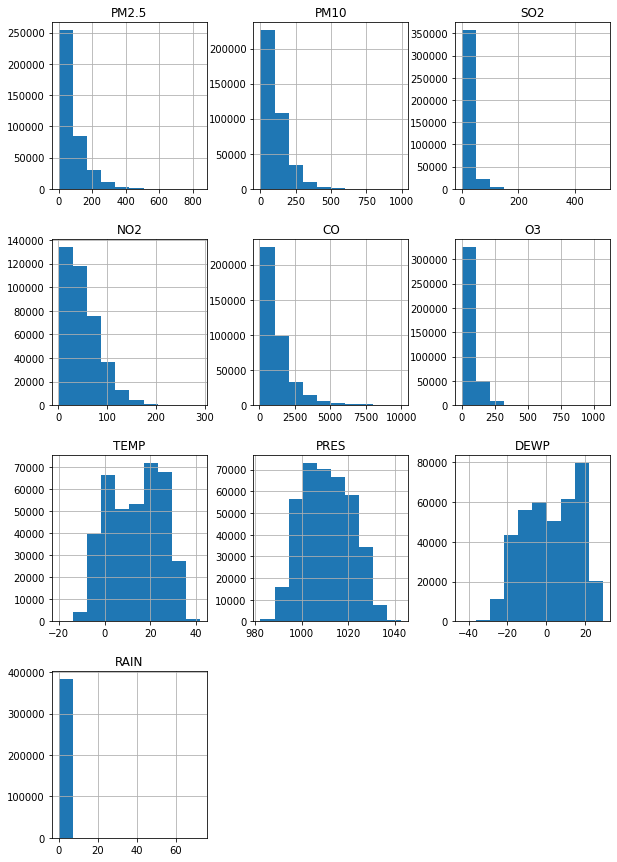

In [63]:
df.hist(figsize=(10, 15))

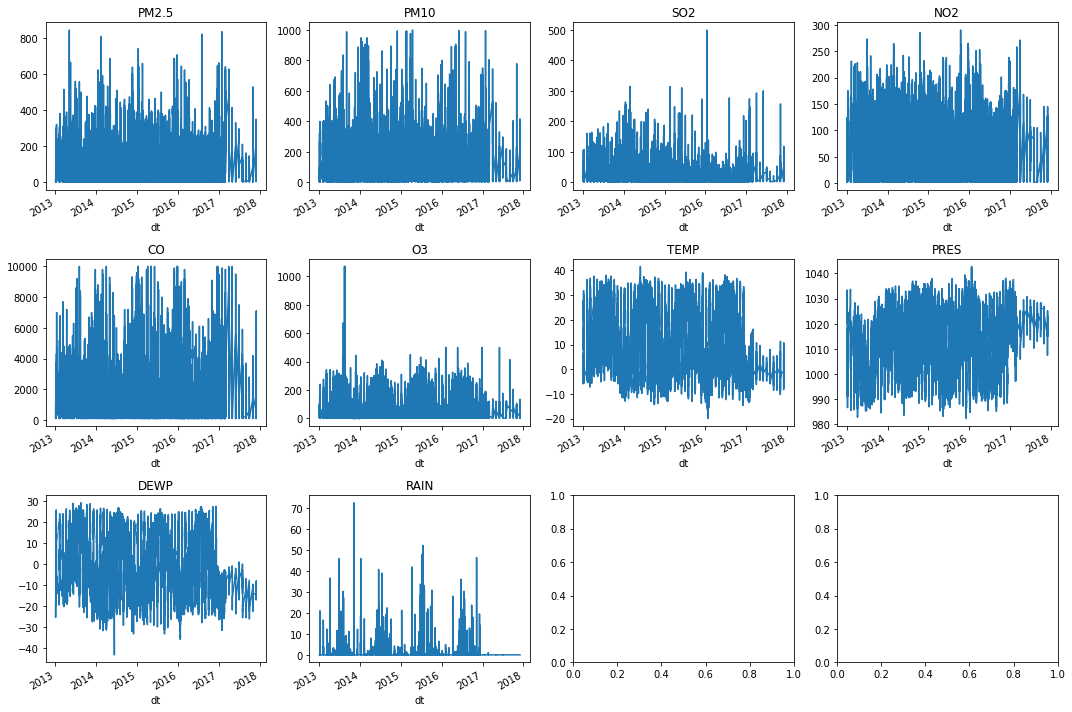

In [70]:
df=df.set_index(pd.to_datetime(df['dt']))
fig, ax=plt.subplots(3, 4, figsize=(15, 10))
for idx, each_col in enumerate(df.columns): 
  if idx>=10: 
    break
  row_idx=idx//4
  col_idx=idx%4
  df[each_col].plot(ax=ax[row_idx][col_idx])
  ax[row_idx][col_idx].set_title(each_col)
plt.tight_layout()

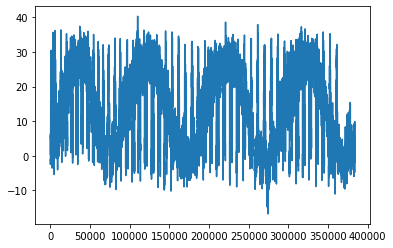

In [96]:
df['TEMP'].rolling(30).median().plot()

In [75]:
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,dt
dt,,,,,,,,,,,
2013-01-03,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,2013-01-03
2013-01-03,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,2013-01-03
2013-01-03,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,2013-01-03
2013-01-03,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,2013-01-03
2013-01-03,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,2013-01-03


In [80]:
# df=df.reset_index(drop=True)
grouped_df=df.groupby('dt').mean()
grouped_df['TEMP'].head()

dt
2013-01-03 00:00:00   -0.880000
2013-01-03 01:00:00   -1.011111
2013-01-03 02:00:00   -1.766667
2013-01-03 03:00:00   -1.840000
2013-01-03 04:00:00   -2.260000
Name: TEMP, dtype: float64

In [ ]:
#replace the selected column for each column to make a seperate model per column


In [136]:
import math
temp_arr=grouped_df['SO2'].values.reshape(-1, 1)
train_size=math.ceil(.75*len(temp_arr))
train_arr=temp_arr[0: train_size]
train_arr.shape

(26116, 1)

In [137]:
days_season=365
X_train=[]
y_train=[]
for i in range(days_season, len(train_arr)): 
  X_train.append(train_arr[i-days_season: i, 0])
  y_train.append(train_arr[i, 0])

In [138]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(25751, 365, 1)

In [139]:
lstm_model=tf.keras.models.Sequential()
lstm_layer_1=tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(365, 1))
lstm_model.add(lstm_layer_1)
lstm_layer_2=tf.keras.layers.LSTM(50, return_sequences=False)
lstm_model.add(lstm_layer_2)
lstm_layer_3=tf.keras.layers.Dense(25)
lstm_model.add(lstm_layer_3)
lstm_output_layer=tf.keras.layers.Dense(1)
lstm_model.add(lstm_output_layer)
lstm_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 365, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_17 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [140]:
lstm_model.compile(optimizer='adam', metrics=['mean_squared_error'], loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
805/805 [==============================] - 301s 369ms/step - loss: 94.0975 - mean_squared_error: 94.0975
Epoch 2/5
805/805 [==============================] - 292s 363ms/step - loss: 27.4414 - mean_squared_error: 27.4414
Epoch 3/5
805/805 [==============================] - 294s 365ms/step - loss: 26.4685 - mean_squared_error: 26.4685
Epoch 4/5
805/805 [==============================] - 293s 364ms/step - loss: 26.0660 - mean_squared_error: 26.0660
Epoch 5/5
805/805 [==============================] - 292s 363ms/step - loss: 25.6369 - mean_squared_error: 25.6369


In [141]:
!mkdir -p saved_model
lstm_model.save('/content/SO2_model.h5')

In [ ]:
# impoty 5hpy to read .h5s

In [16]:

#set an X an Y
#y = df['PM2.5']
#X = df.drop(columns= ['PM2.5'])
#split data shuffle = False




In [ ]:
# Generate 9 total models, one for each feature in the data set
# Feed each model 1 individual feature and the timeseries

In [19]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.LSTM(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))